데이터 살펴보기

In [1]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 평균과 표준편차는 채널별로 구해줍니다.
x_mean = np.mean(x_train, axis = (0, 1, 2))
x_std = np.std(x_train, axis = (0, 1, 2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

from sklearn.model_selection import train_test_split

# 학습/검증 데이터 나누기
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3)
print("data ready~")

170500096/170498071 [==============================] - 11s 0us/step
data ready~


데이터 그려보기

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

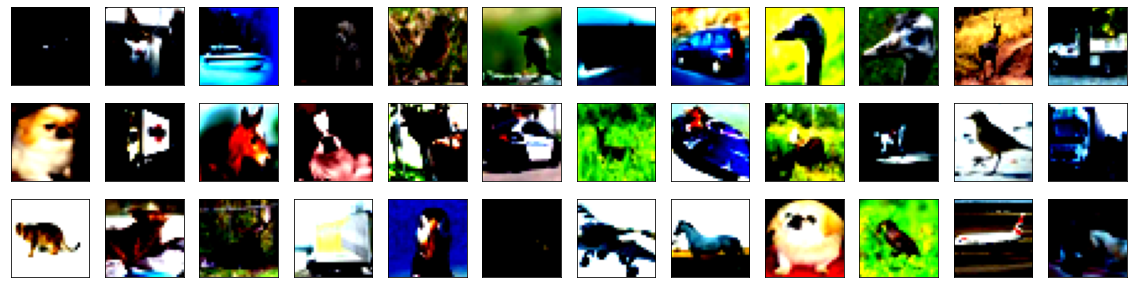

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

배치정규화 사용하여 모델 구성하기

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam


model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', input_shape = (32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())

model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation = 'softmax'))

학습모델 설정하기

In [4]:
model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

이미지 제너레이터를 사용하여 모델 학습시키기

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(horizontal_flip = True,
                                   zoom_range = 0.2,#비율만큼 확대/축소작업의 변수
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest'
                                  )

val_datagen = ImageDataGenerator()

batch_size = 32

train_generator = train_datagen.flow(x_train, y_train,
                                    batch_size = batch_size)
val_generator = val_datagen.flow(x_val, y_val,
                                batch_size = batch_size)

def get_step(train_len, batch_size):
    if(train_len % batch_size > 0):
        return train_len // batch_size + 1
    else:
        return train_len // batch_size

학습 하기

In [6]:
history = model.fit(train_generator,
                    epochs = 30,
                    steps_per_epoch = get_step(len(x_train), batch_size),
                    validation_data = val_generator,
                    validation_steps = get_step(len(x_val), batch_size))

Epoch 1/30
1094/1094 [==============================] - 19s 17ms/step - loss: 1.6277 - acc: 0.0991 - val_loss: 1.4242 - val_acc: 0.0593
Epoch 2/30
1094/1094 [==============================] - 19s 17ms/step - loss: 1.3602 - acc: 0.1023 - val_loss: 1.1512 - val_acc: 0.1132
Epoch 3/30
1094/1094 [==============================] - 19s 17ms/step - loss: 1.2326 - acc: 0.1026 - val_loss: 1.1829 - val_acc: 0.1103
Epoch 4/30
1094/1094 [==============================] - 19s 17ms/step - loss: 1.1480 - acc: 0.1033 - val_loss: 0.9973 - val_acc: 0.1277
Epoch 5/30
1094/1094 [==============================] - 18s 17ms/step - loss: 1.0819 - acc: 0.1036 - val_loss: 0.9770 - val_acc: 0.0674
Epoch 6/30
1094/1094 [==============================] - 18s 17ms/step - loss: 1.0315 - acc: 0.1029 - val_loss: 0.9586 - val_acc: 0.0998
Epoch 7/30
1094/1094 [==============================] - 18s 17ms/step - loss: 0.9855 - acc: 0.1020 - val_loss: 0.9125 - val_acc: 0.1002
Epoch 8/30
1094/1094 [==========================

학습 과정 그려보기

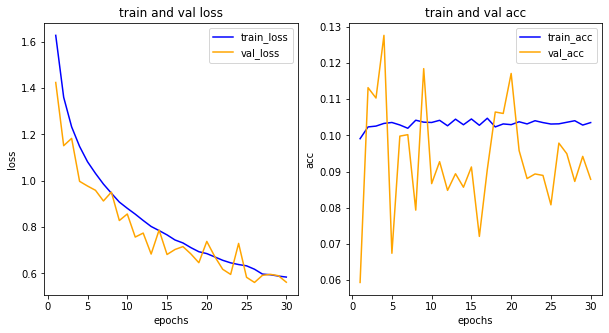

In [7]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

모델 평가하기

In [8]:
model.evaluate(train_generator)

1094/1094 [==============================] - 15s 14ms/step - loss: 0.5227 - acc: 0.1021


[0.5227357745170593, 0.10211428254842758]